In [2]:
# Importar la librería pandas

import pandas as pd

# Importar la librería numpy para operaciones numéricas y manipulación de arrays
import numpy as np

# Importar el módulo ast para trabajar con literales y estructuras de datos anidadas
import ast

# Importa el módulo re para trabajar con expresiones regulares
import re 

In [3]:
# Leer el archivo CSV y cargarlo en un DataFrame
df = pd.read_csv("C:/Users/Usuario/Downloads/movies_dataset.csv")

# Mostrar las primeras 5 filas del DataFrame para examinar la estructura de los datos
print(df.head())

# df ahora contiene los datos del archivo CSV en formato de DataFrame


C:\Users\Usuario\AppData\Local\Temp\ipykernel_8104\4269335017.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/Usuario/Downloads/movies_dataset.csv")


   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497         

In [4]:
# Especificar las columnas que se desean eliminar del DataFrame
columns_to_drop = ["video", "imdb_id", "adult", "original_title", "poster_path", "homepage"]

# Eliminar las columnas especificadas del DataFrame
# El parámetro errors='ignore' asegura que si alguna de las columnas no existe en el DataFrame, no se generará un error.
df = df.drop(columns=columns_to_drop, errors='ignore')



In [5]:
#Convierto los valores nulos de la columna revenue en 0

df["revenue"] = df["revenue"].fillna(0)

In [6]:
#Convierto los valores nulos de la columna budget en 0

df["budget"] = df["budget"].fillna(0)

In [7]:
# Verificar si hay valores nulos en las columnas 'revenue' y 'budget'
null_revenue = df['revenue'].isnull().sum()
null_budget = df['budget'].isnull().sum()

# Mostrar el resultado
print(f"Valores nulos en la columna 'revenue': {null_revenue}")
print(f"Valores nulos en la columna 'budget': {null_budget}")

Valores nulos en la columna 'revenue': 0
Valores nulos en la columna 'budget': 0


In [8]:
# Crear una copia del DataFrame original
df2 = df.copy()

# Cualquier cambio realizado en 'df2' no afectará al DataFrame original 'df', y viceversa.

In [9]:
#Elimino los valores nulo de la columna release_date

df2 = df2.dropna(subset=['release_date'])

In [11]:
# Convertir la columna 'release_date' a formato de fecha `AAAA-mm-dd`

df2["release_date"] = pd.to_datetime(df2["release_date"],  errors='coerce')

In [12]:
# Extraer el año de la columna 'release_date' y asignarlo a una nueva columna 'release_year'
df2['release_year'] = df2['release_date'].dt.year

In [13]:
# Convertir la columna 'release_year' a tipo cadena (string)

df2['release_year'] = df2['release_year'].astype('Int64').astype('str')

In [14]:
# Convertir las columnas 'revenue' y 'budget' a numérico, manejando errores y valores no convertibles
df2['revenue'] = pd.to_numeric(df2['revenue'], errors='coerce')
df2['budget'] = pd.to_numeric(df2['budget'], errors='coerce')

In [15]:
# Crear la columna 'return' calculando el retorno de inversión
df2['return'] = df2.apply(
    lambda row: row['revenue'] / row['budget'] if row['budget'] != 0 else 0, axis=1
)

In [16]:
# Formatear la columna 'return' a dos decimales y asegurar que los ceros no tengan decimales
df2['return'] = df2['return'].apply(lambda x: f"{x:.2f}".rstrip('0').rstrip('.') if x != 0 else '0')

In [17]:
# Crear una copia del DataFrame df2
df4 = df2.copy()

# Esto significa que cualquier modificación realizada en 'df4' no afectará a 'df2', y viceversa.

In [18]:
# Mostrar un resumen informativo del DataFrame df4
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45379 entries, 0 to 45465
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  4491 non-null   object        
 1   budget                 45376 non-null  float64       
 2   genres                 45379 non-null  object        
 3   id                     45379 non-null  object        
 4   original_language      45368 non-null  object        
 5   overview               44438 non-null  object        
 6   popularity             45377 non-null  object        
 7   production_companies   45379 non-null  object        
 8   production_countries   45379 non-null  object        
 9   release_date           45376 non-null  datetime64[ns]
 10  revenue                45379 non-null  float64       
 11  runtime                45130 non-null  float64       
 12  spoken_languages       45376 non-null  object        
 13  status

In [19]:
def extract_id_and_name(value):
    # Verifica si el valor es nulo y devuelve un diccionario con valores NaN para 'id' y 'name'
    if pd.isnull(value):
        return {'id': np.nan, 'name': np.nan}
    
    try:
        # Intenta convertir el valor en un diccionario utilizando ast.literal_eval
        collection_dict = ast.literal_eval(value)
        # Verifica si el resultado es un diccionario
        if isinstance(collection_dict, dict):
            # Extrae 'id' y 'name' del diccionario, o NaN si no están presentes
            return {
                'id': collection_dict.get('id', np.nan),
                'name': collection_dict.get('name', np.nan)
            }
        else:
            return {'id': np.nan, 'name': np.nan}
    except (ValueError, SyntaxError):
        # Captura errores de conversión y devuelve valores NaN
        return {'id': np.nan, 'name': np.nan}

# Aplicar la función 'extract_id_and_name' a la columna 'belongs_to_collection'
# La función se aplica a cada valor de la columna y se descompone en dos nuevas columnas: 'collection_id' y 'collection_name'
df4[['collection_id', 'collection_name']] = df4['belongs_to_collection'].apply(lambda x: pd.Series(extract_id_and_name(x)))

# Esta operación convierte las estructuras de datos anidadas en la columna 'belongs_to_collection' en dos columnas separadas
# con los valores correspondientes para 'id' y 'name'. Los valores nulos y errores de conversión se manejan adecuadamente.

In [20]:
# Mostrar los valores de la columna 'genres' en la fila 1
print(df4.loc[0, 'genres'])

# Mostrar los valores de la columna 'genres' en la fila 2
print(df4.loc[1, 'genres'])

[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]
[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]


In [81]:
# Eliminar filas duplicadas en el DataFrame basadas en la columna 'id'
# La opción 'subset='id'' asegura que la eliminación de duplicados se realice considerando solo la columna 'id'.
# La opción 'keep='first'' mantiene la primera aparición de cada valor único en la columna 'id' y elimina las filas duplicadas subsiguientes.
df_idunicos = df4.drop_duplicates(subset='id', keep='first')

# El DataFrame 'df_idunicos' ahora contiene solo una fila por cada valor único en la columna 'id'.

In [22]:
# Convertir la columna 'id' a tipo cadena (str)
# Esto es útil si la columna 'id' contiene valores numéricos que deben tratarse como cadenas
# en lugar de números, por ejemplo, para facilitar fusiones con otras tablas o para
# evitar posibles errores en el manejo de identificadores únicos.

df4['id'] = df4['id'].astype(str)

In [23]:
# Se define un nuevo DataFrame para almacenar la información de la columna 'belongs_to_collection'

# Se seleccionan las columnas deseadas: 'id', 'collection_id' y 'collection_name'

df_belongs_to_collection = df_idunicos[['id', 'collection_id', 'collection_name']]

In [24]:
# Se eliminan filas con valores nulos

df_belongs_to_collection = df_belongs_to_collection.dropna(subset=['collection_id', 'collection_name'])

In [25]:
# La función lambda utiliza una expresión regular (regex) para buscar y eliminar cualquier '.0' al final de la cadena.

df_belongs_to_collection['collection_id'] = df_belongs_to_collection['collection_id'].apply(lambda x: re.sub(r'\.0$', '', str(x)))


In [26]:
# Definir la ruta del archivo CSV
# Esta es la ubicación en el sistema de archivos donde se guardará el DataFrame como un archivo CSV.
ruta_archivo = 'C:/Users/Usuario/Desktop/Desarrollo de mi proyecto python/Proyecto/Data Limpia Movies/df_belongs_to_collection.csv'

# Guardar el DataFrame en un archivo CSV
# El DataFrame 'df_belongs_to_collection' se guarda en la ruta especificada, 
# sin incluir los índices (index=False) para que no se agregue una columna extra con los índices del DataFrame.
df_belongs_to_collection.to_csv(ruta_archivo, index=False)

In [27]:
# Crear un nuevo DataFrame con las columnas 'genres' e 'id'
df_genres_id = df_idunicos[['genres', 'id']]

In [28]:
# Convertir cadenas en listas de diccionarios
df_genres_id['genres'] = df_genres_id['genres'].apply(ast.literal_eval)

# Separar cada género en una fila individual (explode)
df_exploded = df_genres_id.explode('genres')


# Extraer id y nombre del género
df_exploded['id_genre'] = df_exploded['genres'].apply(lambda x: x.get('id') if isinstance(x, dict) else None)
df_exploded['genre'] = df_exploded['genres'].apply(lambda x: x.get('name') if isinstance(x, dict) else None)

# Eliminar filas con valores nulos y columna original genres
df_exploded = df_exploded.dropna(subset=['id_genre', 'genre'])
df_exploded = df_exploded.drop(columns=['genres'])

# Resetear el índice
df_exploded = df_exploded.reset_index(drop=True)

print(df_exploded)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8104\722462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genres_id['genres'] = df_genres_id['genres'].apply(ast.literal_eval)


           id  id_genre      genre
0         862      16.0  Animation
1         862      35.0     Comedy
2         862   10751.0     Family
3        8844      12.0  Adventure
4        8844      14.0    Fantasy
...       ...       ...        ...
90964   30840   10749.0    Romance
90965  111109      18.0      Drama
90966   67758      28.0     Action
90967   67758      18.0      Drama
90968   67758      53.0   Thriller

[90969 rows x 3 columns]


In [29]:
# Eliminar el '.0' de los valores en la columna 'id_companies'
df_exploded['id_genre'] = df_exploded['id_genre'].apply(lambda x: re.sub(r'\.0$', '', str(x)))


In [30]:
df_exploded

,id,id_genre,genre
0,862,16,Animation
1,862,35,Comedy
2,862,10751,Family
3,8844,12,Adventure
4,8844,14,Fantasy
...,...,...,...
90964,30840,10749,Romance
90965,111109,18,Drama
90966,67758,28,Action
90967,67758,18,Drama


In [31]:
# Definir la ruta del archivo CSV
ruta_archivo = 'C:/Users/Usuario/Desktop/Desarrollo de mi proyecto python/Proyecto/Data Limpia Movies/df_exploded.csv'


# Guardar el DataFrame en un archivo CSV
df_exploded.to_csv(ruta_archivo, index=False)

In [32]:
#  Crear un nuevo DataFrame que contiene la información de las compañías de producción y sus respectivos IDs de película
df_productioncompanies_id = df_idunicos[['production_companies', 'id']]

In [33]:
# Convertir cadenas que representan listas de diccionarios en objetos de Python
df_productioncompanies_id['production_companies'] = df_productioncompanies_id['production_companies'].apply(ast.literal_eval)

# Separar cada compañía de producción en una fila individual (explode)
df_production_companies = df_productioncompanies_id.explode('production_companies')

# Extraer el 'id' y el 'name' de cada compañía de producción, verificando que sea un diccionario
df_production_companies['id_companies'] = df_production_companies['production_companies'].apply(lambda x: x.get('id') if isinstance(x, dict) else None)
df_production_companies['companies'] = df_production_companies['production_companies'].apply(lambda x: x.get('name') if isinstance(x, dict) else None)

# Eliminar filas con valores nulos en 'id_companies' o 'companies'
df_production_companies = df_production_companies.dropna(subset=['id_companies', 'companies'])

# Eliminar la columna original 'production_companies' que ya no es necesaria
df_production_companies = df_production_companies.drop(columns=['production_companies'])

# Resetear el índice para que sea secuencial después de eliminar filas
df_production_companies = df_production_companies.reset_index(drop=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8104\1004446786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_productioncompanies_id['production_companies'] = df_productioncompanies_id['production_companies'].apply(ast.literal_eval)


In [34]:
# Limpiar el sufijo '.0' de los valores en la columna 'id_companies'
# Esto estandariza los IDs de las compañías de producción, eliminando cualquier sufijo innecesario en formato de número decimal

df_production_companies['id_companies'] = df_production_companies['id_companies'].apply(lambda x: re.sub(r'\.0$', '', str(x)))


In [35]:
df_production_companies

,id,id_companies,companies
0,862,3,Pixar Animation Studios
1,8844,559,TriStar Pictures
2,8844,2550,Teitler Film
3,8844,10201,Interscope Communications
4,15602,6194,Warner Bros.
...,...,...,...
70444,30840,16323,20th Century Fox Television
70445,30840,38978,CanWest Global Communications
70446,111109,19653,Sine Olivia
70447,67758,6165,American World Pictures


In [36]:

# Definir la ruta del archivo CSV
ruta_archivo = 'C:/Users/Usuario/Desktop/Desarrollo de mi proyecto python/Proyecto/Data Limpia Movies/df_production_companies.csv'


# Guardar el DataFrame en un archivo CSV
df_production_companies.to_csv(ruta_archivo, index=False)

In [37]:
# Imprimir las primeras 5 filas de la columna 'spoken_languages' para revisar su contenido
print(df_idunicos['spoken_languages'].head())

0             [{'iso_639_1': 'en', 'name': 'English'}]
1    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
2             [{'iso_639_1': 'en', 'name': 'English'}]
3             [{'iso_639_1': 'en', 'name': 'English'}]
4             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, dtype: object


In [38]:
# Verificar la estructura de un valor en la columna 'production_companies'
example_value = df_idunicos['spoken_languages'].iloc[1]
print(example_value)

[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]


In [39]:
df_languages = df_idunicos[["id", "spoken_languages"]].copy()

In [40]:
#Elimino filas nulas de la columna spoken_languages
df_languages = df_languages.dropna(subset=["spoken_languages"])

In [41]:
# Función para limpiar y extraer los datos de la columna 'spoken_languages'
def clean_and_extract(languages):
    """
    Convierte una cadena de listas de diccionarios a una lista de tuplas (abreviatura del idioma, nombre del idioma).
    """
    # Convertir la cadena de listas de diccionarios a una lista de diccionarios
    languages = ast.literal_eval(languages)
    clean_data = []
    for lang in languages:
        # Verificar si el elemento es un diccionario y contiene las claves necesarias
        if isinstance(lang, dict) and 'iso_639_1' in lang and 'name' in lang:
            clean_data.append((lang['iso_639_1'], lang['name']))
    return clean_data

# Crear listas para almacenar los datos extraídos
id_list = []
language_abrev_list = []
language_movie_list = []

# Iterar sobre el DataFrame para procesar cada fila
for idx, row in df_languages.iterrows():
    # Limpiar y extraer los datos de la columna 'spoken_languages'
    clean_languages = clean_and_extract(row['spoken_languages'])
    # Duplicar filas según la cantidad de lenguajes extraídos
    for lang in clean_languages:
        id_list.append(row['id'])
        language_abrev_list.append(lang[0])
        language_movie_list.append(lang[1])

# Crear un nuevo DataFrame con las listas generadas
df_cleaned = pd.DataFrame({
    'id': id_list,                  # ID de la película
    'language_abrev': language_abrev_list,  # Abreviatura del idioma
    'language_movie': language_movie_list   # Nombre completo del idioma
})

# Imprimir el DataFrame resultante para verificar el resultado
print(df_cleaned.head())

      id language_abrev language_movie
0    862             en        English
1   8844             en        English
2   8844             fr       Français
3  15602             en        English
4  31357             en        English


In [42]:
display(df_cleaned)

,id,language_abrev,language_movie
0,862,en,English
1,8844,en,English
2,8844,fr,Français
3,15602,en,English
4,31357,en,English
...,...,...,...
53235,222848,en,English
53236,30840,en,English
53237,111109,tl,
53238,67758,en,English


In [43]:
# Definir la ruta del archivo CSV
ruta_archivo = 'C:/Users/Usuario/Desktop/Desarrollo de mi proyecto python/Proyecto/Data Limpia Movies/df_cleaned.csv'

# Guardar el DataFrame en un archivo CSV
df_cleaned.to_csv(ruta_archivo, index=False)

In [44]:
# Crear un nuevo DataFrame con las columnas 'id' y 'title'
df_title = df_idunicos[['id', 'title']]

In [45]:
# Definir la ruta del archivo CSV donde se guardará el DataFrame
ruta_archivo = 'C:/Users/Usuario/Desktop/Desarrollo de mi proyecto python/Proyecto/Data Limpia Movies/df_title.csv'

# Guardar el DataFrame 'df_title' en un archivo CSV en la ruta especificada
# Se usa index=False para no incluir el índice del DataFrame en el archivo CSV
df_title.to_csv(ruta_archivo, index=False)

In [83]:
# Crear un nuevo DataFrame eliminando las columnas especificadas
df_central = df_idunicos.drop(columns=[
    'belongs_to_collection', 
    'genres', 
    'overview', 
    'production_companies', 
    'production_countries', 
    'collection_id', 
    'collection_name',
    'spoken_languages',
    'tagline',
])

In [47]:
# Eliminar los '.0' al final de los valores en la columna 'runtime'

df_central["runtime"] = df_central["runtime"].apply(lambda x: re.sub(r'\.0$', '', str(x)))

In [48]:
# Eliminar los '.0' al final de los valores en la columna 'budget'

df_central["budget"] = df_central["budget"].apply(lambda x: re.sub(r'\.0$', '', str(x)))

In [49]:
df_central

,budget,id,original_language,popularity,release_date,revenue,runtime,status,vote_average,vote_count,release_year,return
0,30000000,862,en,21.946943,1995-10-30,373554033.0,81,Released,7.7,5415.0,1995,12.45
1,65000000,8844,en,17.015539,1995-12-15,262797249.0,104,Released,6.9,2413.0,1995,4.04
2,0,15602,en,11.7129,1995-12-22,0.0,101,Released,6.5,92.0,1995,0
3,16000000,31357,en,3.859495,1995-12-22,81452156.0,127,Released,6.1,34.0,1995,5.09
4,0,11862,en,8.387519,1995-02-10,76578911.0,106,Released,5.7,173.0,1995,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45460,0,30840,en,5.683753,1991-05-13,0.0,104,Released,5.7,26.0,1991,0
45462,0,111109,tl,0.178241,2011-11-17,0.0,360,Released,9.0,3.0,2011,0
45463,0,67758,en,0.903007,2003-08-01,0.0,90,Released,3.8,6.0,2003,0
45464,0,227506,en,0.003503,1917-10-21,0.0,87,Released,0.0,0.0,1917,0


In [50]:
# Contar la cantidad de valores nulos en la columna 'budget'
cantidad_nulos = df_central['release_date'].isnull().sum()

# Mostrar la cantidad de valores nulos
print(f"Cantidad de valores nulos en la columna 'release_date': {cantidad_nulos}")

Cantidad de valores nulos en la columna 'release_date': 3


In [51]:
# Eliminar las filas donde la columna 'release_date' tiene valores nulos
df_central = df_central.dropna(subset=['release_date'])

In [52]:

# Contar la cantidad de valores nulos en la columna 'budget'
cantidad_nulos = df_central['budget'].isnull().sum()

# Mostrar la cantidad de valores nulos
print(f"Cantidad de valores nulos en la columna 'budget': {cantidad_nulos}")


Cantidad de valores nulos en la columna 'budget': 0


In [53]:
# Completar los valores nulos en la columna 'budget' con 0
df_central['budget'] = df_central['budget'].fillna(0)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8104\4213533713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_central['budget'] = df_central['budget'].fillna(0)


In [54]:
df_central.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45346 entries, 0 to 45465
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   budget             45346 non-null  object        
 1   id                 45346 non-null  object        
 2   original_language  45335 non-null  object        
 3   popularity         45346 non-null  object        
 4   release_date       45346 non-null  datetime64[ns]
 5   revenue            45346 non-null  float64       
 6   runtime            45346 non-null  object        
 7   status             45266 non-null  object        
 8   vote_average       45346 non-null  float64       
 9   vote_count         45346 non-null  float64       
 10  release_year       45346 non-null  object        
 11  return             45346 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 4.5+ MB


In [55]:
# Definir la ruta del archivo CSV donde se guardará el Dat
ruta_archivo = 'C:/Users/Usuario/Desktop/Desarrollo de mi proyecto python/Proyecto/Data Limpia Movies/df_central.csv'

# Guardar el DataFrame en un archivo CSV
df_central.to_csv(ruta_archivo, index=False)

In [56]:
# Cargar el archivo CSV 'credits.csv' desde la ruta especificada en un DataFrame
# Se utiliza el archivo CSV que contiene la información de los créditos de las películas
df_credits = pd.read_csv("C:/Users/Usuario/Downloads/credits.csv")

In [57]:
# Mostrar las primeras 5 filas del DataFrame df_credits para inspeccionar su contenido
print(df_credits.head())

                                                cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862  


In [58]:
# Eliminar duplicados en la columna 'id', manteniendo la primera instancia
df_credits_sin_duplicados = df_credits.drop_duplicates(subset=['id'], keep='first')

In [59]:
# Función para verificar si una cadena es una lista válida
def is_valid_list(s):
    try:
        # Intenta convertir la cadena a una lista usando ast.literal_eval
        val = ast.literal_eval(s)
        return isinstance(val, list)
    except (ValueError, SyntaxError):
        return False

# Aplicar la función para crear una máscara de registros válidos
valid_mask = df_credits_sin_duplicados['cast'].apply(is_valid_list) & df_credits_sin_duplicados['crew'].apply(is_valid_list)

# Crear DataFrames separados
df_pandas_valid = df_credits_sin_duplicados[valid_mask].reset_index(drop=True)
df_pandas_invalid = df_credits_sin_duplicados[~valid_mask].reset_index(drop=True)

In [60]:
# Suponiendo que df_pandas_valid ya está definido
# Asegúrate de convertir las cadenas en listas reales
df_pandas_valid['cast'] = df_pandas_valid['cast'].apply(lambda x: ast.literal_eval(x))
df_pandas_valid['crew'] = df_pandas_valid['crew'].apply(lambda x: ast.literal_eval(x))

# Filtrar filas con listas vacías en cast o crew
df_credits_sin_duplicados_vacias = df_pandas_valid[(df_pandas_valid['cast'].apply(len) == 0) | (df_pandas_valid['crew'].apply(len) == 0)]

# Filtrar filas sin listas vacías en cast y crew
df_credits_sin_duplicados_Novacios = df_pandas_valid[(df_pandas_valid['cast'].apply(len) > 0) & (df_pandas_valid['crew'].apply(len) > 0)]

In [61]:
#Creo las listas vacias que luego van a formar las columnas de mi df
cast_id_list = []
character_list = []
credit_id_list = []
gender_list = []
id_list = []
name_list = []
order_list = []
profile_path_list = []
movie_id_list = []

# Iterar sobre el DataFrame original

for idx, row in df_credits_sin_duplicados_Novacios.iterrows():
    # La columna 'cast' ya es una lista de diccionarios
    cast_list = row['cast']
    # Extraer los datos y agregarlos a las listas
    movie_id = row['id']
    for cast in cast_list:
        cast_id_list.append(cast.get('cast_id', None))
        character_list.append(cast.get('character', None))
        credit_id_list.append(cast.get('credit_id', None))
        gender_list.append(cast.get('gender', None))
        id_list.append(cast.get('id', None))
        name_list.append(cast.get('name', None))
        order_list.append(cast.get('order', None))
        profile_path_list.append(cast.get('profile_path', None))
        movie_id_list.append(movie_id) 
# Crear el nuevo DataFrame
df_cast = pd.DataFrame({
    'id_cast': cast_id_list,
    'character': character_list,
    'id_credit': credit_id_list,
    'gender': gender_list,
    'id_actor': id_list,
    'name': name_list,
    'order': order_list,
    'profile_path': profile_path_list,
    'id': movie_id_list
})

In [2]:
df_cast

NameError: name 'df_cast' is not defined

In [88]:
# Paso 1: Contar el número de películas por actor
actor_movie_count = df_cast.groupby('name').size().reset_index(name='movie_count')

# Paso 2: Seleccionar los 50 actores con más películas
top_50_actors = actor_movie_count.nlargest(50, 'movie_count')

# Paso 3: Filtrar df_cast para obtener solo las películas de estos 50 actores
df_top_50_actor = df_cast[df_cast['name'].isin(top_50_actors['name'])]

# Paso 4: Seleccionar solo las columnas 'name' y 'id'
df_top_50_actor = df_top_50_actor[['name', 'id']]

# Imprimir el resultado
print(df_top_50_actor.head())


               name     id
13   Robin Williams   8844
69   Robert De Niro    949
84      Danny Trejo    949
262    Frank Welker  21032
330  Robert De Niro    524


In [3]:
df_top_50_actor

NameError: name 'df_top_50_actor' is not defined

In [97]:
print(movie_return.dtypes)

id        object
return    object
dtype: object


In [94]:
# Crear un nuevo DataFrame que contenga solo las columnas 'id' y 'return'
movie_return = df_central[['id', 'return']]

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(movie_return.head())


      id return
0    862  12.45
1   8844   4.04
2  15602      0
3  31357   5.09
4  11862      0


In [1]:
# Convertir la columna 'id' a tipo entero
movie_return['id'] = movie_return['id'].astype(int)

NameError: name 'movie_return' is not defined

In [96]:
# Definir la ruta del archivo CSV donde se guardará el DataFrame df_top_50_actor
ruta_archivo = 'C:/Users/Usuario/Desktop/Api_Peliculas/Proyecto/Data Limpia cast__crew/df_top_50_actor.csv'

# Guardar el DataFrame en un archivo CSV
df_top_50_actor.to_csv(ruta_archivo, index=False)

# Definir la ruta del archivo CSV donde se guardará el DataFrame movie_return
ruta_archivo = 'C:/Users/Usuario/Desktop/Api_Peliculas/Proyecto/Data Limpia Movies/movie_return.csv'

# Guardar el DataFrame en un archivo CSV
movie_return.to_csv(ruta_archivo, index=False)

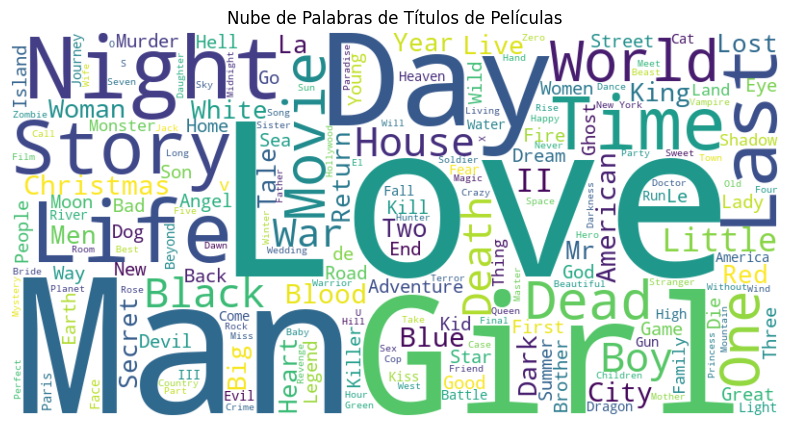

In [ ]:
# Concatenar todos los títulos en una sola cadena
text = ' '.join(df_completa['title'])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))  # Establecer el tamaño de la figura
plt.imshow(wordcloud, interpolation='bilinear')  # Mostrar la imagen de la nube de palabras
plt.axis('off')  # Desactivar los ejes para una visualización limpia
plt.title('Nube de Palabras de Títulos de Películas')  # Título del gráfico
plt.show()  # Mostrar el gráfico

In [64]:
# Crear listas para las nuevas columnas
credit_id_list = []
department_list = []
gender_list = []
id_list = []
job_list = []
name_list = []
profile_path_list = []
movie_id_list = []
# Iterar sobre el DataFrame original
for idx, row in df_credits_sin_duplicados_Novacios.iterrows():
    # La columna 'crew' ya es una lista de diccionarios
    crew_list = row['crew']
    # Extraer los datos y agregarlos a las listas
    movie_id = row['id']
    for crew in crew_list:
        credit_id_list.append(crew.get('credit_id', None))
        department_list.append(crew.get('department', None))
        gender_list.append(crew.get('gender', None))
        id_list.append(crew.get('id', None))
        job_list.append(crew.get('job', None))
        name_list.append(crew.get('name', None))
        profile_path_list.append(crew.get('profile_path', None))
        movie_id_list.append(movie_id) 
# Crear el nuevo DataFrame
df_crew = pd.DataFrame({
    'credit_id': credit_id_list,
    'department': department_list,
    'gender': gender_list,
    'id_director': id_list,
    'job': job_list,
    'name': name_list,
    'profile_path': profile_path_list,
    'id': movie_id_list
})

In [65]:
# Eliminar la columna 'profile_path' del DataFrame df_crew in-place
df_crew.drop(columns=['profile_path'], inplace=True)

In [66]:
# Eliminar la columna 'profile_path' del DataFrame df_cast in-place
df_cast.drop(columns=['profile_path'], inplace=True)

In [67]:
# Crear una copia idéntica del DataFrame df_crew
df_cast_copia = df_cast.copy()

df_crew_copia = df_crew.copy()

In [68]:
# Crear el DataFrame df_actor con las columnas 'id', 'name', y 'character'
df_actor = df_cast_copia[['id_actor', 'name']].copy()

In [69]:
# Eliminar los valores duplicados en la columna 'id_actor' y conservar la primera aparición
df_actor_unique = df_actor.drop_duplicates(subset='id_actor', keep='first')


In [70]:
# Definir la ruta del archivo CSV donde se guardará el DataFrame
ruta_archivo = 'C:/Users/Usuario/Desktop/Desarrollo de mi proyecto python/Proyecto/Data Limpia cast__crew/df_actor_unique.csv'

# Guardar el DataFrame en un archivo CSV
df_actor_unique.to_csv(ruta_archivo, index=False)



In [71]:
# Elimina la columna 'gender' del DataFrame df_cast_copia.
df_cast_copia = df_cast_copia.drop(columns=['gender'])

In [72]:
# Eliminar la columna 'name' del DataFrame df_cast
df_cast_copia = df_cast_copia.drop(columns=['name'])

In [73]:
# Definir la ruta del archivo CSV donde se guardará el DataFrame
ruta_archivo = 'C:/Users/Usuario/Desktop/Desarrollo de mi proyecto python/Proyecto/Data Limpia cast__crew/df_cast_copia.csv'

# Guardar el DataFrame en un archivo CSV
df_cast_copia.to_csv(ruta_archivo, index=False)

In [74]:
# Crear el nuevo DataFrame con las columnas id_director y name
df_director = df_crew[['id_director', 'name']].copy()

# Mostrar las primeras filas del nuevo DataFrame
df_director.head()

,id_director,name
0,7879,John Lasseter
1,12891,Joss Whedon
2,7,Andrew Stanton
3,12892,Joel Cohen
4,12893,Alec Sokolow


In [75]:
# Eliminar los valores duplicados en la columna 'id_director' y conservar la primera aparición
df_director_unique = df_director.drop_duplicates(subset='id_director', keep='first')

In [76]:
# Definir la ruta del archivo CSV donde se guardará el DataFrame
ruta_archivo = 'C:/Users/Usuario/Desktop/Desarrollo de mi proyecto python/Proyecto/Data Limpia cast__crew/df_director_unique.csv'

# Guardar el DataFrame en un archivo CSV
df_director_unique.to_csv(ruta_archivo, index=False)

In [77]:
# Eliminar las columnas name y gender del DataFrame df_crew_copia
df_crew_copia = df_crew_copia.drop(columns=['name', 'gender'])

# Verificar que las columnas hayan sido eliminadas
df_crew_copia.head()


,credit_id,department,id_director,job,id
0,52fe4284c3a36847f8024f49,Directing,7879,Director,862
1,52fe4284c3a36847f8024f4f,Writing,12891,Screenplay,862
2,52fe4284c3a36847f8024f55,Writing,7,Screenplay,862
3,52fe4284c3a36847f8024f5b,Writing,12892,Screenplay,862
4,52fe4284c3a36847f8024f61,Writing,12893,Screenplay,862


In [78]:
# Definir la ruta del archivo CSV donde se guardará el DataFrame
ruta_archivo = 'C:/Users/Usuario/Desktop/Desarrollo de mi proyecto python/Proyecto/Data Limpia cast__crew/df_crew_copia.csv'

# Guardar el DataFrame en un archivo CSV
df_crew_copia.to_csv(ruta_archivo, index=False)